Data pre-processing

In [2]:
!pip install numpy matplotlib

  Using cached numpy-2.4.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (6.6 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached numpy-2.4.2-cp313-cp313-macosx_14_0_arm64.whl (5.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 7.4 MB/s  0:00:01m0:00:0100:01
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.2 MB/s  0:00:00 eta 0:00:01
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip inst

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Dataset (CPU temperature readings in °C)
data = np.array([
    52, 53, 54, 55, 56,
    57, 58, 59, 60, 61,
    62, 63, 64, 65, 66,
    67, 68, 69, 70, 95
])

In [5]:
# Sort data first
sorted_data = np.sort(data)

In [6]:
# ----- Compute Statistics -----
mean = np.mean(data)
median = np.median(data)
print(f"Mean: {mean}")
print(f"Median: {median}")

Mean: 62.7
Median: 61.5


In [7]:
# Quartiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

In [8]:
# Deciles (10%, 20%, ..., 90%)
deciles = [np.percentile(data, i) for i in range(10, 100, 10)]

In [9]:
# 90th and 95th percentile
p90 = np.percentile(data, 90)
p95 = np.percentile(data, 95)

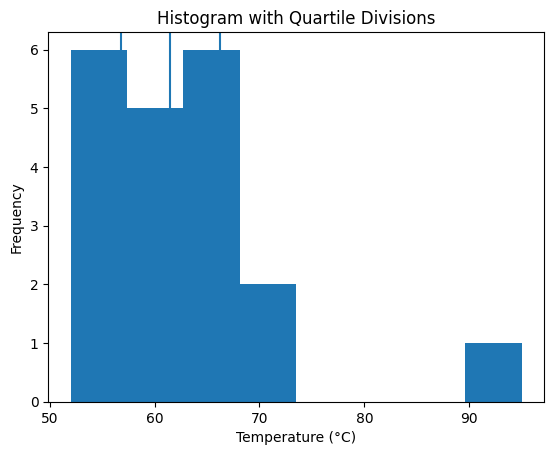

In [10]:
# -----------------------------
# Plot 1: Histogram with Median & Quartiles
# -----------------------------
plt.figure()
plt.hist(data, bins=8)

plt.axvline(q1)
plt.axvline(q2)
plt.axvline(q3)

plt.title("Histogram with Quartile Divisions")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


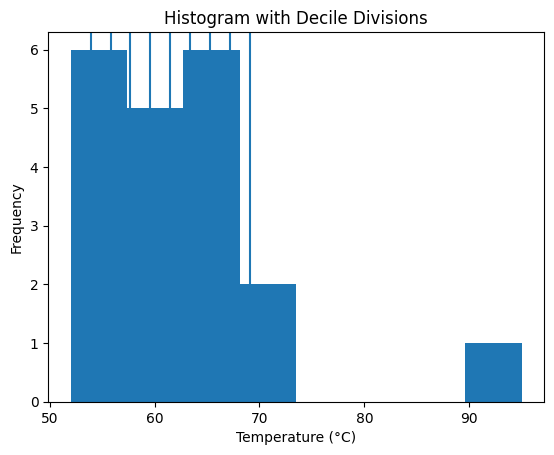

In [11]:
# -----------------------------
# Plot 2: Histogram with Decile Divisions
# -----------------------------
plt.figure()
plt.hist(data, bins=8)

for d in deciles:
    plt.axvline(d)

plt.title("Histogram with Decile Divisions")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

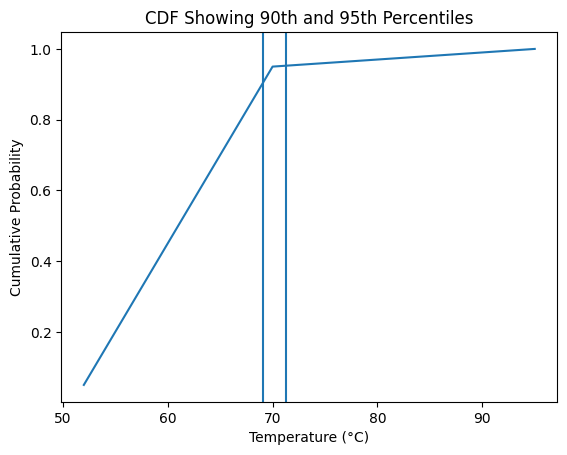

In [12]:
# -----------------------------
# Plot 3: CDF with 90th and 95th Percentiles
# -----------------------------
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure()
plt.plot(sorted_data, cdf)

plt.axvline(p90)
plt.axvline(p95)

plt.title("CDF Showing 90th and 95th Percentiles")
plt.xlabel("Temperature (°C)")
plt.ylabel("Cumulative Probability")
plt.show()

In [13]:
# ---- IQR Calculation ----
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [14]:
# Detect outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Detected Outliers:", outliers)

Q1: 56.75
Q3: 66.25
IQR: 9.5
Lower Bound: 42.5
Upper Bound: 80.5
Detected Outliers: [95]


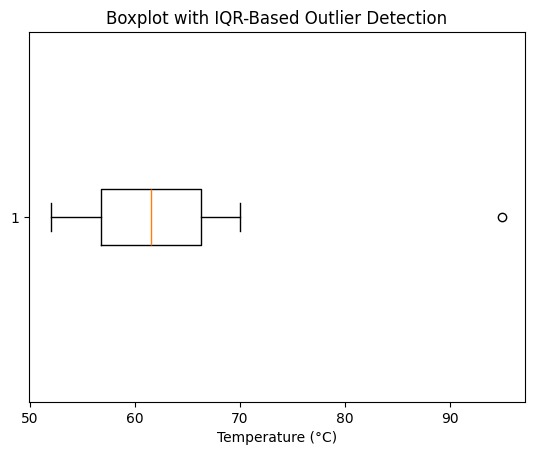

In [15]:
# -----------------------------
# Plot 4: Boxplot (Shows Outlier Automatically)
# -----------------------------
plt.figure()
plt.boxplot(data, vert=False)
plt.title("Boxplot with IQR-Based Outlier Detection")
plt.xlabel("Temperature (°C)")
plt.show()

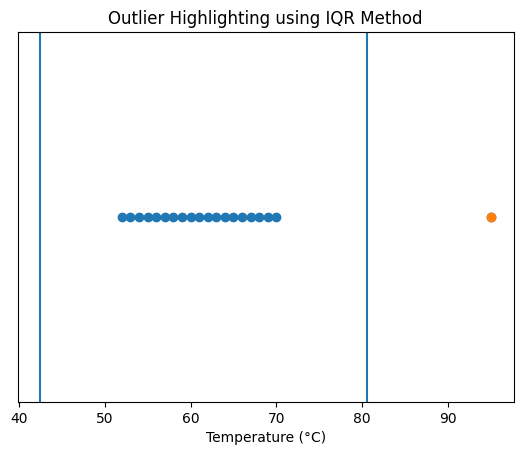

In [16]:
# -----------------------------
# Plot 5: Data Points with Outliers Highlighted
# -----------------------------
plt.figure()

# Plot all data points
plt.scatter(data, np.zeros_like(data))

# Highlight outliers
if len(outliers) > 0:
    plt.scatter(outliers, np.zeros_like(outliers))

plt.axvline(lower_bound)
plt.axvline(upper_bound)

plt.title("Outlier Highlighting using IQR Method")
plt.xlabel("Temperature (°C)")
plt.yticks([])
plt.show()
